In [100]:
import pickle
import yaml
import torch

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx"
})

In [101]:
configs = yaml.safe_load(open("config/config.yml")) 
config = configs['sigma']['sigma_01']

In [104]:
with open(f'../results/{config["name"]}.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [105]:
t = data['t']
x = data['x']
y_data = data['y_data']
true = data['true']
x_preds = data['x_preds']
domain = [-1, 1]

plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 16

In [106]:
def calculate_mean_and_quantile(x_preds):
    x_mean = torch.mean(x_preds, axis=0)
    lower_quantile = torch.quantile(x_preds, 0.05, axis=0)
    upper_quantile = torch.quantile(x_preds, 0.95, axis=0)

    return x_mean, lower_quantile, upper_quantile


def plot_results(config, t, x, true, y_data, x_preds):
    x_mean, lower_quantile, upper_quantile = calculate_mean_and_quantile(x_preds)

    plt.figure()
    plt.plot(x, true, label='true')
    plt.plot(t, y_data, label='data')

    line, = plt.plot(t, x_mean, label='inverse solution')
    # Plot the quantile range as a shaded area
    plt.fill_between(x, lower_quantile, upper_quantile, color=line.get_color(), alpha=0.5, label='90% quantile range')
    #plt.plot(t, A@x_solution.numpy(), label='A @ solution')
    plt.axis([domain[0], domain[1], -0.1, 1.5])
    plt.xlabel('t')
    plt.ylabel('x')

    plt.savefig(f"plots/{config['plot_parameters']['solution_plot']}")


In [137]:
def plot_results_subplots(configs, type):

    fig, axs = plt.subplots(2, 5)
    ii, jj = 0, 0
    for idx, conf in enumerate(configs[type]):
        with open(f'../results/{conf}.pickle', 'rb') as handle:
            data = pickle.load(handle)
        
        x_mean, lower_quantile, upper_quantile = calculate_mean_and_quantile(data['x_preds'])

        axs[ii, jj].plot(data['t'], data['true'],linewidth=0.7)
        axs[ii, jj].plot(data['x'], data['y_data'],linewidth=0.7)

        line, = axs[ii, jj].plot(data['t'], x_mean, label='inverse solution',linewidth=0.7)
        axs[ii, jj].fill_between(data['t'], lower_quantile, upper_quantile, color=line.get_color(), alpha=0.5, label='90% quantile range')
        
        axs[ii, jj].set_title(f'\sigma^2= {configs[type][conf]["sigma_noise"]}^2')
        ii = ii +1
        if ii >1:
            jj = jj +1
            ii = 0



In [138]:
plot_results_subplots(configs, 'sigma')

RuntimeError: latex was not able to process the following string:
b'\\\\sigma^2= 0.02^2'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../7aa05cfd02a090db34104576835b4438.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 7aa05cfd02a090db34104576835b4438.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.18 {\rmfamily \sigma
                      ^2= 0.02^2}
No pages of output.
Transcript written on 7aa05cfd02a090db34104576835b4438.log.




<Figure size 640x480 with 10 Axes>

FileNotFoundError: [Errno 2] No such file or directory: 'plots/solution_plot_sigma_01.png'

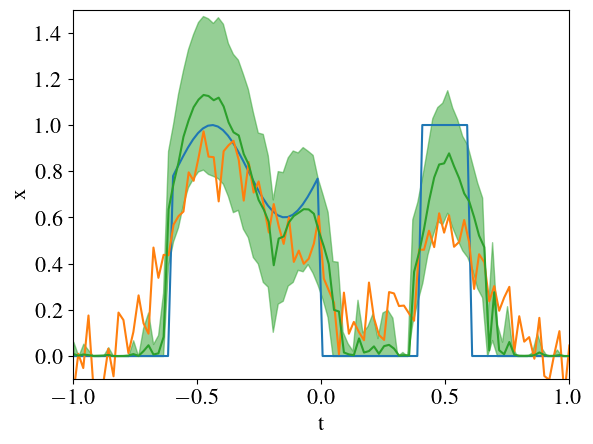

In [ ]:
plot_results(config, t, x, true, y_data, x_preds)